In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
customer_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
categorical_cols = customer_churn.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [6]:
customer_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
customer_churn.duplicated().sum()

0

In [8]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
customer_churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [10]:
customer_churn.columns = customer_churn.columns.str.lower()

In [11]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [12]:
customer_churn['customerid'].value_counts()

customerid
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

In [13]:
for i in customer_churn.columns:
    print("This the Unique Values in",i,customer_churn[i].unique())

This the Unique Values in customerid ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
This the Unique Values in gender ['Female' 'Male']
This the Unique Values in seniorcitizen [0 1]
This the Unique Values in partner ['Yes' 'No']
This the Unique Values in dependents ['No' 'Yes']
This the Unique Values in tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
This the Unique Values in phoneservice ['No' 'Yes']
This the Unique Values in multiplelines ['No phone service' 'No' 'Yes']
This the Unique Values in internetservice ['DSL' 'Fiber optic' 'No']
This the Unique Values in onlinesecurity ['No' 'Yes' 'No internet service']
This the Unique Values in onlinebackup ['Yes' 'No' 'No internet service']
This the Unique Values in deviceprotection ['No' 'Yes' 'No internet service']
This t

In [14]:
for x in customer_churn.columns:
    print("This the Unique Values in",x,customer_churn[x].nunique())

This the Unique Values in customerid 7043
This the Unique Values in gender 2
This the Unique Values in seniorcitizen 2
This the Unique Values in partner 2
This the Unique Values in dependents 2
This the Unique Values in tenure 73
This the Unique Values in phoneservice 2
This the Unique Values in multiplelines 3
This the Unique Values in internetservice 3
This the Unique Values in onlinesecurity 3
This the Unique Values in onlinebackup 3
This the Unique Values in deviceprotection 3
This the Unique Values in techsupport 3
This the Unique Values in streamingtv 3
This the Unique Values in streamingmovies 3
This the Unique Values in contract 3
This the Unique Values in paperlessbilling 2
This the Unique Values in paymentmethod 4
This the Unique Values in monthlycharges 1585
This the Unique Values in totalcharges 6531
This the Unique Values in churn 2


In [15]:
for z in customer_churn.columns:
    print("This the Unique Values in",z,customer_churn[z].value_counts())

This the Unique Values in customerid customerid
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
This the Unique Values in gender gender
Male      3555
Female    3488
Name: count, dtype: int64
This the Unique Values in seniorcitizen seniorcitizen
0    5901
1    1142
Name: count, dtype: int64
This the Unique Values in partner partner
No     3641
Yes    3402
Name: count, dtype: int64
This the Unique Values in dependents dependents
No     4933
Yes    2110
Name: count, dtype: int64
This the Unique Values in tenure tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
This the Unique Values in phoneservice phoneservice
Yes    6361
No      682
Name: count, dtype: int64
This the Unique Values in multiplelines multiplelines
No    

In [16]:
check_question_mark = customer_churn.columns =='?'
print(check_question_mark)

[False False False False False False False False False False False False
 False False False False False False False False False]


In [17]:
check_empty = customer_churn.columns ==' '
print(check_empty)

[False False False False False False False False False False False False
 False False False False False False False False False]


In [18]:
nan_values = customer_churn.columns == None
print(nan_values)

[False False False False False False False False False False False False
 False False False False False False False False False]


In [19]:
customer_churn.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [20]:
print(customer_churn['tenure'].dtype)

int64


In [21]:
customer_churn['tenure'] = pd.to_numeric(customer_churn['tenure'], errors='coerce')

In [22]:
print(customer_churn['tenure'].dtype)

int64


<Axes: ylabel='tenure'>

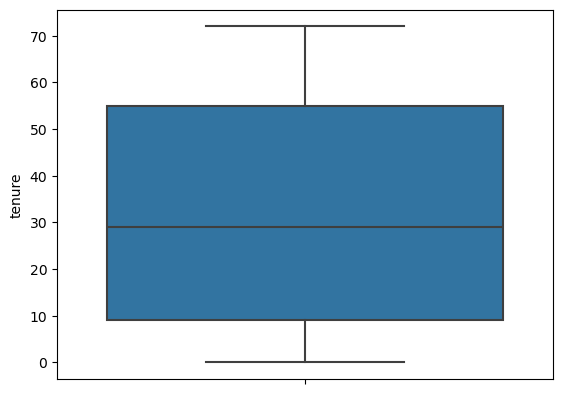

In [23]:
sns.boxplot(y=customer_churn['tenure'])

In [24]:
LL_tenure = customer_churn['tenure'].mean() - 3 * customer_churn['tenure'].std()
LL_tenure 

-41.30729441104045

In [25]:
UL_tenure = customer_churn['tenure'].mean() + 3 * customer_churn['tenure'].std()
UL_tenure 

106.0495917275249

In [26]:
print("The Number of Outliers are: ",len(customer_churn.loc[(customer_churn['tenure'] < LL_tenure)|(customer_churn['tenure'] > UL_tenure)]))

The Number of Outliers are:  0


In [27]:
print("The Record of Outliers are: ",customer_churn.loc[(customer_churn['tenure'] < LL_tenure)|(customer_churn['tenure'] > UL_tenure)])

The Record of Outliers are:  Empty DataFrame
Columns: [customerid, gender, seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, contract, paperlessbilling, paymentmethod, monthlycharges, totalcharges, churn]
Index: []

[0 rows x 21 columns]


<Axes: ylabel='monthlycharges'>

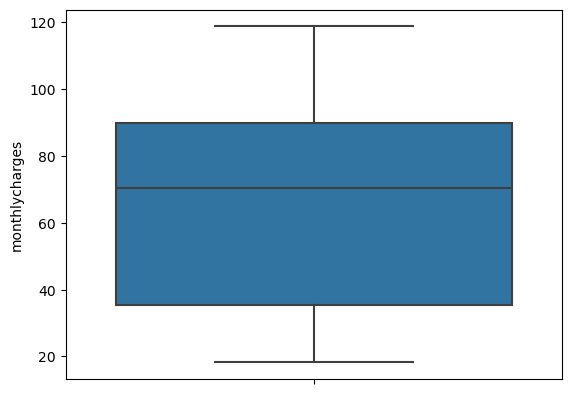

In [28]:
sns.boxplot(y=customer_churn['monthlycharges'])

In [29]:
LL_monthly_charges = customer_churn['monthlycharges'].mean() - 3 * customer_churn['monthlycharges'].std()
LL_monthly_charge = round(LL_monthly_charges,2)
LL_monthly_charges

-25.508448832436443

In [30]:
UL_monthly_charges = customer_churn['monthlycharges'].mean() + 3 * customer_churn['monthlycharges'].std()
UL_monthly_charge = round(UL_monthly_charges,2)
UL_monthly_charges

155.0318337536348

In [31]:
print("The Number of Outliers are: ",len(customer_churn.loc[(customer_churn['monthlycharges'] < LL_monthly_charges)|(customer_churn['monthlycharges'] > UL_monthly_charges)]))

The Number of Outliers are:  0


In [32]:
print("The Record of Outliers are: ",customer_churn.loc[(customer_churn['monthlycharges'] < LL_monthly_charges)|(customer_churn['monthlycharges'] > UL_monthly_charges)])

The Record of Outliers are:  Empty DataFrame
Columns: [customerid, gender, seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, contract, paperlessbilling, paymentmethod, monthlycharges, totalcharges, churn]
Index: []

[0 rows x 21 columns]


In [33]:
print(customer_churn['totalcharges'].dtype)

object


In [34]:
customer_churn['totalcharges'] = pd.to_numeric(customer_churn['totalcharges'], errors='coerce')
customer_churn.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [35]:
print(customer_churn['totalcharges'].dtype)

float64


In [36]:
null_rows = customer_churn[customer_churn['totalcharges'].isnull()]
print(null_rows)

      customerid  gender  seniorcitizen partner dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     phoneservice     multiplelines internetservice       onlinesecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [37]:
fill_totalcharges = customer_churn['totalcharges'].mean()
fill_totalcharges = round(fill_totalcharges,2)
fill_totalcharges

2283.3

In [38]:
customer_churn['totalcharges'].fillna(value=fill_totalcharges,inplace=True)

In [39]:
customer_churn.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [40]:
null_rows = customer_churn[customer_churn['totalcharges'].isnull()]
print(null_rows)

Empty DataFrame
Columns: [customerid, gender, seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, contract, paperlessbilling, paymentmethod, monthlycharges, totalcharges, churn]
Index: []

[0 rows x 21 columns]


In [41]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [42]:
customer_churn.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300440
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<Axes: ylabel='totalcharges'>

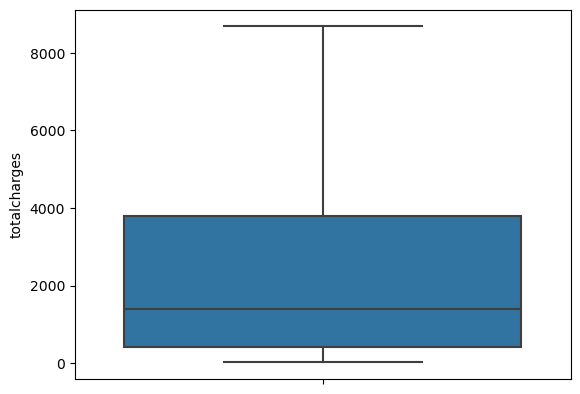

In [43]:
sns.boxplot(y=customer_churn['totalcharges'])

In [44]:
LL_totalcharges = customer_churn['totalcharges'].mean() - 3 * customer_churn['totalcharges'].std()
LL_totalcharges

-4511.700333256633

In [45]:
UL_totalcharges = customer_churn['totalcharges'].mean() + 3 * customer_churn['totalcharges'].std()
UL_totalcharges

9078.30121356332

In [46]:
print("The Number of Outliers are: ",len(customer_churn.loc[(customer_churn['totalcharges'] < LL_totalcharges)|(customer_churn['totalcharges'] > UL_totalcharges)]))

The Number of Outliers are:  0


In [47]:
print("The Record of Outliers are: ",customer_churn.loc[(customer_churn['totalcharges'] < LL_totalcharges)|(customer_churn['totalcharges'] > UL_totalcharges)])

The Record of Outliers are:  Empty DataFrame
Columns: [customerid, gender, seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, contract, paperlessbilling, paymentmethod, monthlycharges, totalcharges, churn]
Index: []

[0 rows x 21 columns]


In [48]:
categorical_cols = customer_churn.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object')


In [49]:
customer_churn['tenure_group'] = pd.cut(customer_churn['tenure'], bins=[0, 12, 24, 36, 48, 60, 72],
                                        labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])
customer_churn['tenure_group']

0        0-12
1       24-36
2        0-12
3       36-48
4        0-12
        ...  
7038    12-24
7039    60-72
7040     0-12
7041     0-12
7042    60-72
Name: tenure_group, Length: 7043, dtype: category
Categories (6, object): ['0-12' < '12-24' < '24-36' < '36-48' < '48-60' < '60-72']

In [50]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   seniorcitizen     7043 non-null   int64   
 3   partner           7043 non-null   object  
 4   dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   phoneservice      7043 non-null   object  
 7   multiplelines     7043 non-null   object  
 8   internetservice   7043 non-null   object  
 9   onlinesecurity    7043 non-null   object  
 10  onlinebackup      7043 non-null   object  
 11  deviceprotection  7043 non-null   object  
 12  techsupport       7043 non-null   object  
 13  streamingtv       7043 non-null   object  
 14  streamingmovies   7043 non-null   object  
 15  contract          7043 non-null   object  
 16  paperlessbilling  7043 n

In [51]:
customer_churn

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,36-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,12-24
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,60-72
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12


<Axes: xlabel='churn', ylabel='count'>

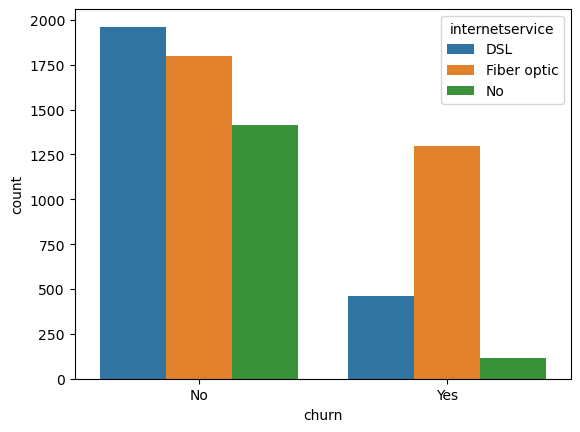

In [52]:
sns.countplot(x='churn', hue='internetservice', data=customer_churn)

C:\Users\ibrah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tenure', ylabel='Count'>

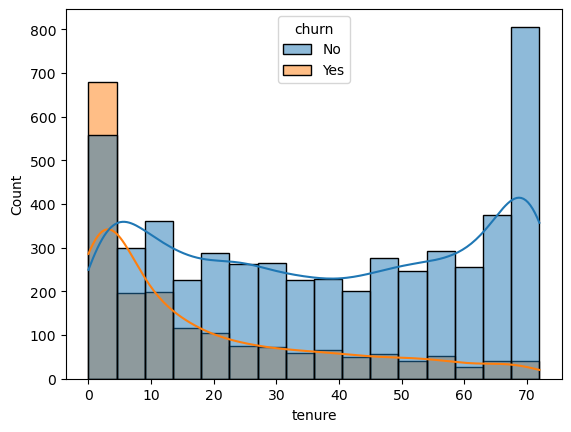

In [53]:
sns.histplot(data=customer_churn, x='tenure', hue='churn', kde=True)

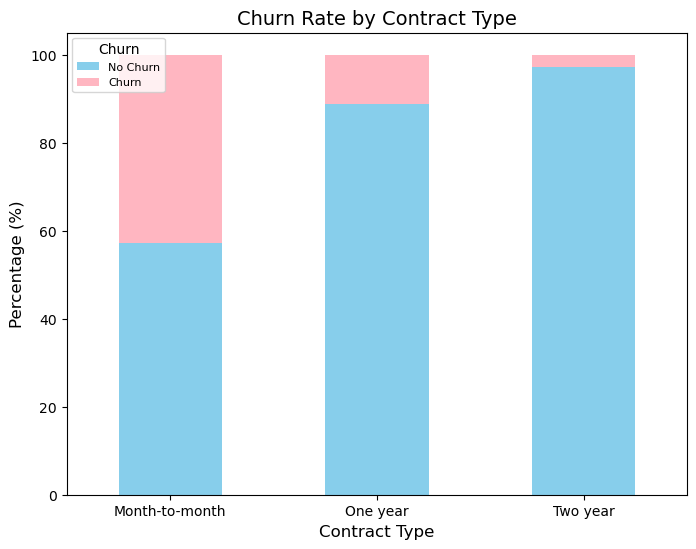

In [54]:
contract_churn = customer_churn.groupby('contract')['churn'].value_counts(normalize=True).unstack() * 100

contract_churn.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'lightpink'])

plt.title('Churn Rate by Contract Type', fontsize=14)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(['No Churn', 'Churn'], title='Churn', fontsize=8)
plt.xticks(rotation=0)
plt.show()

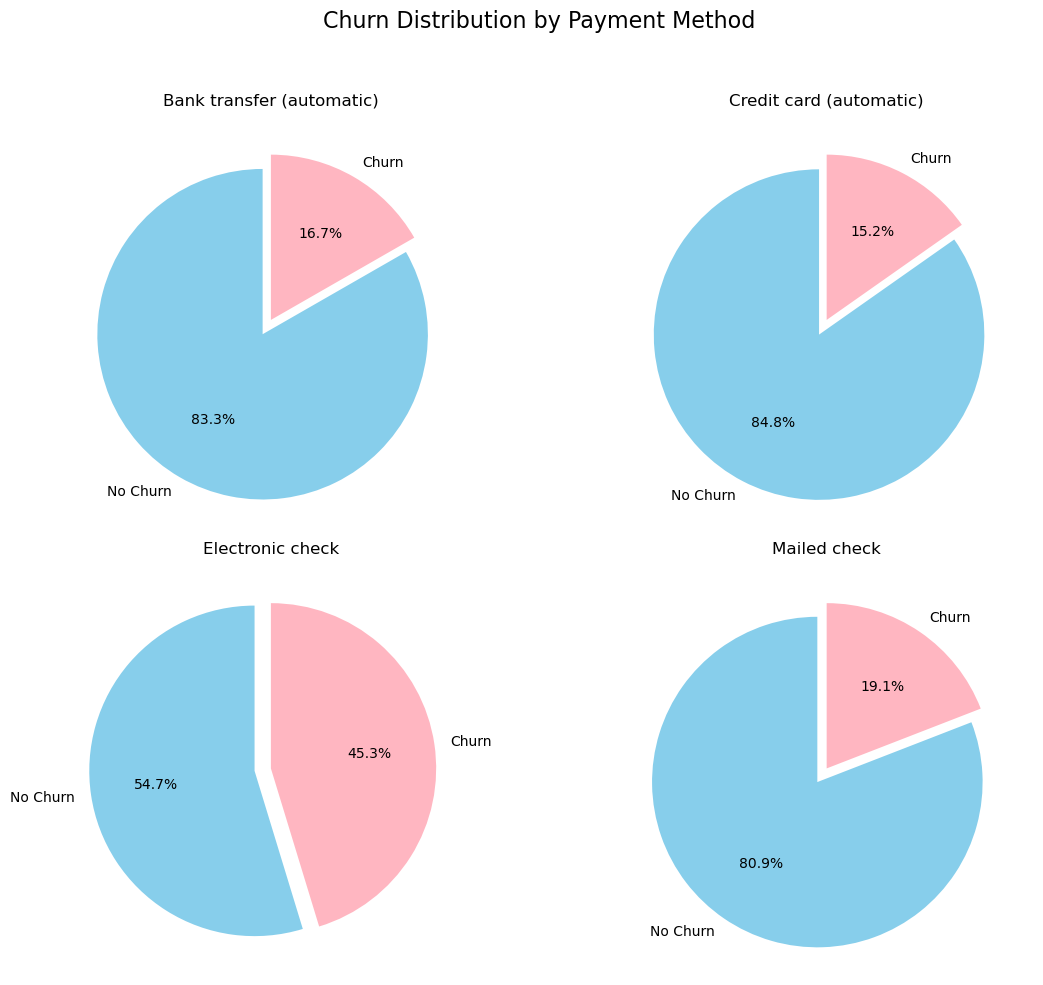

In [55]:
payment_churn = customer_churn.groupby('paymentmethod')['churn'].value_counts(normalize=True).unstack() * 100

# Creating the figure
plt.figure(figsize=(12, 10))

# (subplot 1)
plt.subplot(2, 2, 1)
plt.pie(
    payment_churn.iloc[0], 
    labels=['No Churn', 'Churn'], 
    autopct='%1.1f%%', 
    colors=['skyblue', 'lightpink'], 
    startangle=90,
    explode=(0.1, 0)
)
plt.title(f'{payment_churn.index[0]}', fontsize=12)

# (subplot 2)
plt.subplot(2, 2, 2)
plt.pie(
    payment_churn.iloc[1], 
    labels=['No Churn', 'Churn'], 
    autopct='%1.1f%%', 
    colors=['skyblue', 'lightpink'], 
    startangle=90,
    explode=(0.1, 0)
)
plt.title(f'{payment_churn.index[1]}', fontsize=12)

# (subplot 3)
plt.subplot(2, 2, 3)
plt.pie(
    payment_churn.iloc[2], 
    labels=['No Churn', 'Churn'], 
    autopct='%1.1f%%', 
    colors=['skyblue', 'lightpink'], 
    startangle=90,
    explode=(0.1, 0)
)
plt.title(f'{payment_churn.index[2]}', fontsize=12)

# (subplot 4)
plt.subplot(2, 2, 4)
plt.pie(
    payment_churn.iloc[3], 
    labels=['No Churn', 'Churn'], 
    autopct='%1.1f%%', 
    colors=['skyblue', 'lightpink'], 
    startangle=90,
    explode=(0.1, 0)
)
plt.title(f'{payment_churn.index[3]}', fontsize=12)

plt.suptitle('Churn Distribution by Payment Method', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

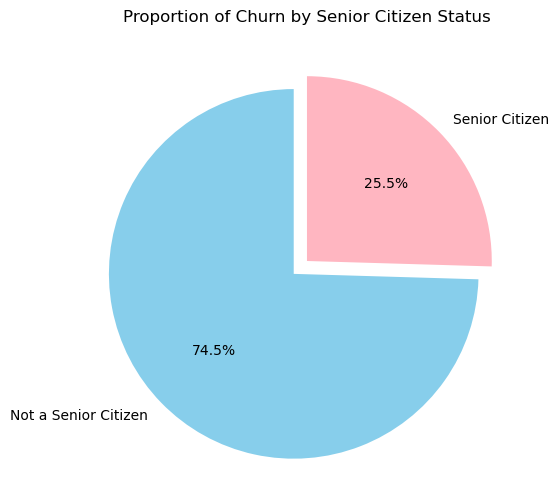

In [56]:
customer_churn['seniorcitizenlabel'] = customer_churn['seniorcitizen'].map({0: 'Not a Senior Citizen', 1: 'Senior Citizen'})

senior_churn_totals = customer_churn[customer_churn['churn'] == 'Yes']['seniorcitizenlabel'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(
    senior_churn_totals, 
    autopct='%1.1f%%', 
    colors=['skyblue', 'lightpink'],
    startangle=90, 
    labels=senior_churn_totals.index,
    explode=(0.1, 0)
)

plt.title('Proportion of Churn by Senior Citizen Status')
plt.show()

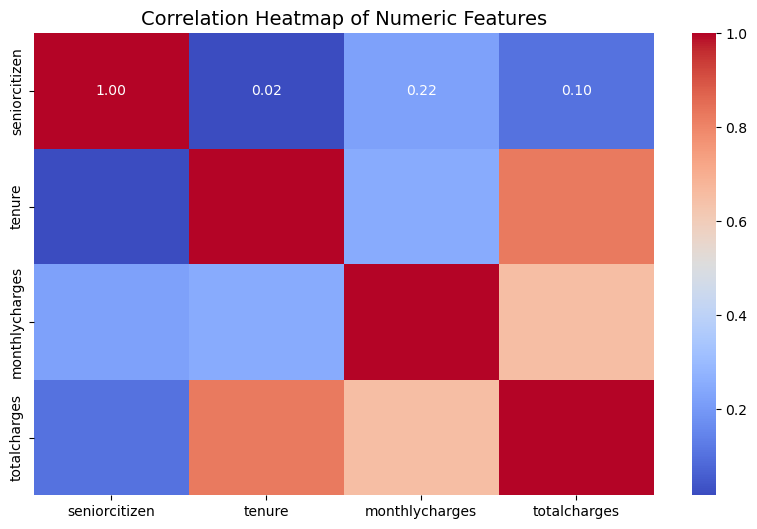

In [57]:
numeric_cols = customer_churn.select_dtypes(include=['number'])

# Generating correlation matrix
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap of Numeric Features', fontsize=14)
plt.show()

In [58]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customerid          7043 non-null   object  
 1   gender              7043 non-null   object  
 2   seniorcitizen       7043 non-null   int64   
 3   partner             7043 non-null   object  
 4   dependents          7043 non-null   object  
 5   tenure              7043 non-null   int64   
 6   phoneservice        7043 non-null   object  
 7   multiplelines       7043 non-null   object  
 8   internetservice     7043 non-null   object  
 9   onlinesecurity      7043 non-null   object  
 10  onlinebackup        7043 non-null   object  
 11  deviceprotection    7043 non-null   object  
 12  techsupport         7043 non-null   object  
 13  streamingtv         7043 non-null   object  
 14  streamingmovies     7043 non-null   object  
 15  contract            7043 non-null   ob

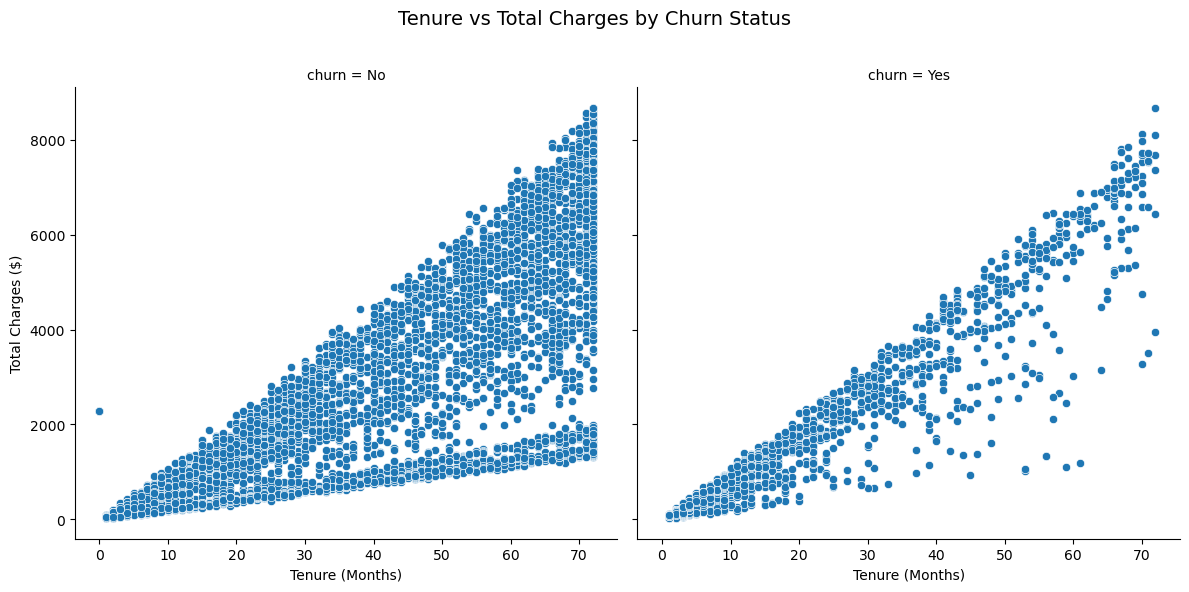

In [59]:
g = sns.FacetGrid(customer_churn, col='churn', height=6, aspect=1)
g.map(sns.scatterplot, 'tenure', 'totalcharges')

g.set_axis_labels('Tenure (Months)', 'Total Charges ($)')
g.fig.suptitle('Tenure vs Total Charges by Churn Status', fontsize=14)
g.fig.subplots_adjust(top=0.85)
plt.show()

In [60]:
customer_churn.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_group,seniorcitizenlabel
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12,Not a Senior Citizen
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,24-36,Not a Senior Citizen
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12,Not a Senior Citizen
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,36-48,Not a Senior Citizen
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12,Not a Senior Citizen


In [61]:
customer_churn.tail()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_group,seniorcitizenlabel
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,12-24,Not a Senior Citizen
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,60-72,Not a Senior Citizen
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12,Not a Senior Citizen
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12,Senior Citizen
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No,60-72,Not a Senior Citizen


In [62]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customerid          7043 non-null   object  
 1   gender              7043 non-null   object  
 2   seniorcitizen       7043 non-null   int64   
 3   partner             7043 non-null   object  
 4   dependents          7043 non-null   object  
 5   tenure              7043 non-null   int64   
 6   phoneservice        7043 non-null   object  
 7   multiplelines       7043 non-null   object  
 8   internetservice     7043 non-null   object  
 9   onlinesecurity      7043 non-null   object  
 10  onlinebackup        7043 non-null   object  
 11  deviceprotection    7043 non-null   object  
 12  techsupport         7043 non-null   object  
 13  streamingtv         7043 non-null   object  
 14  streamingmovies     7043 non-null   object  
 15  contract            7043 non-null   ob

In [63]:
customer_churn = customer_churn.drop('customerid', axis = 1)
customer_churn = customer_churn.drop('tenure_group', axis = 1)
customer_churn = customer_churn.drop('seniorcitizenlabel', axis = 1)

In [64]:
X = customer_churn.drop('churn', axis = 1)
y = customer_churn['churn']

In [65]:
for i in X.columns:
    if X[i].dtype not in ['int64', 'float64']:
        print('This is the value counts for features objects only before encoding: ',X[i].value_counts)

This is the value counts for features objects only before encoding:  <bound method IndexOpsMixin.value_counts of 0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object>
This is the value counts for features objects only before encoding:  <bound method IndexOpsMixin.value_counts of 0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: partner, Length: 7043, dtype: object>
This is the value counts for features objects only before encoding:  <bound method IndexOpsMixin.value_counts of 0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: dependents, Length: 7043, dtype: object>
This is the value counts for features objects only before encoding:  <bound method IndexOpsMixin.v

In [66]:
for i in X.columns:
    if X[i].dtype not in ['int64', 'float64']:
        lab_en = LabelEncoder()
        X[i] = lab_en.fit_transform(X[i])

In [67]:
for i in X.columns:
    if X[i].dtype not in ['int64', 'float64']:
        print('This is the value counts for features objects only after encoding: ',X[i].value_counts)

This is the value counts for features objects only after encoding:  <bound method IndexOpsMixin.value_counts of 0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7043, dtype: int32>
This is the value counts for features objects only after encoding:  <bound method IndexOpsMixin.value_counts of 0       1
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    1
7042    0
Name: partner, Length: 7043, dtype: int32>
This is the value counts for features objects only after encoding:  <bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    0
Name: dependents, Length: 7043, dtype: int32>
This is the value counts for features objects only after encoding:  <bound method IndexOpsMixin.value_counts of 0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7

In [68]:
print('This is the value counts for target column only before encoding:\n',y.value_counts())
lab_en = LabelEncoder()
y = lab_en.fit_transform(y)
print('This is the counts for target column only after encoding:\n',y)

This is the value counts for target column only before encoding:
 churn
No     5174
Yes    1869
Name: count, dtype: int64
This is the counts for target column only after encoding:
 [0 0 1 ... 0 1 0]


In [75]:
numeric_columns = X.select_dtypes(include=['int64', 'float64'])
print(numeric_columns)

      seniorcitizen  tenure  monthlycharges  totalcharges
0                 0       1           29.85         29.85
1                 0      34           56.95       1889.50
2                 0       2           53.85        108.15
3                 0      45           42.30       1840.75
4                 0       2           70.70        151.65
...             ...     ...             ...           ...
7038              0      24           84.80       1990.50
7039              0      72          103.20       7362.90
7040              0      11           29.60        346.45
7041              1       4           74.40        306.60
7042              0      66          105.65       6844.50

[7043 rows x 4 columns]


In [78]:
numeric_columns = [col for col in numeric_columns if col != 'seniorcitizen']

In [79]:
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])
X.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994971
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173876
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.960399
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.195400
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.941193
